
	Shapiro-Wilk normality test

data:  samp_1
W = 0.99854, p-value = 0.9611


	F test to compare two variances

data:  pop_1 and samp_1
F = 1.0592, num df = 9999, denom df = 486, p-value = 0.3962
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.9276029 1.2003383
sample estimates:
ratio of variances 
          1.059229 

[1] "The sample data meets the parametric assumptions."

	One Sample t-test

data:  samp_1
t = -0.13518, df = 486, p-value = 0.8925
alternative hypothesis: true mean is not equal to 52
95 percent confidence interval:
 50.61590 53.20591
sample estimates:
mean of x 
  51.9109 

[1] "There was NOT a significant difference between the sample mean and the population mean"


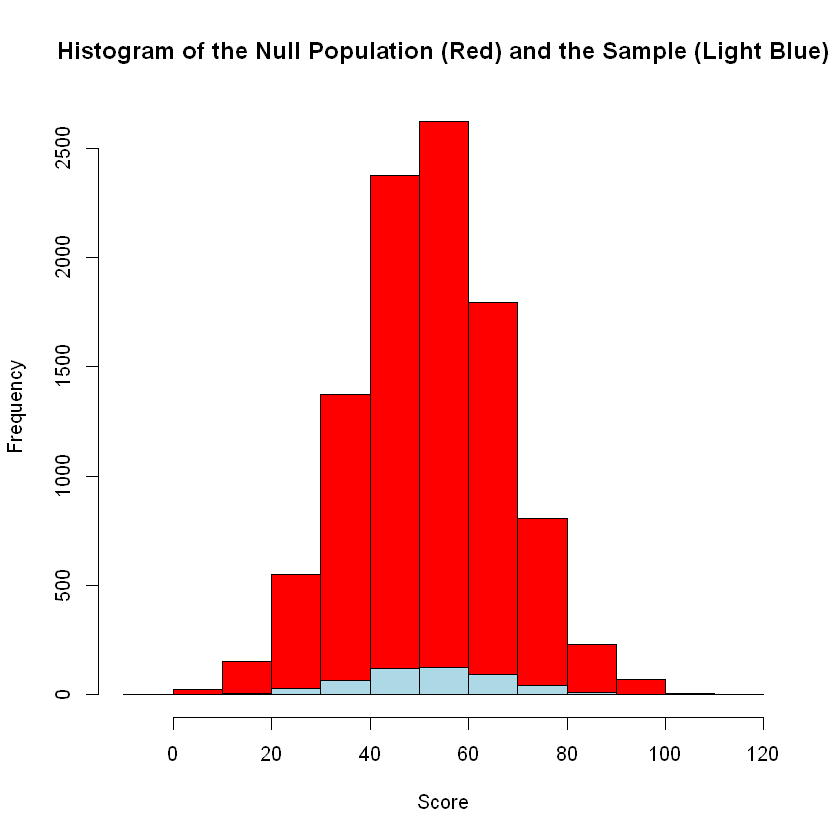

[1] "P-value obtained from permutation test = "
[1] 0.9424


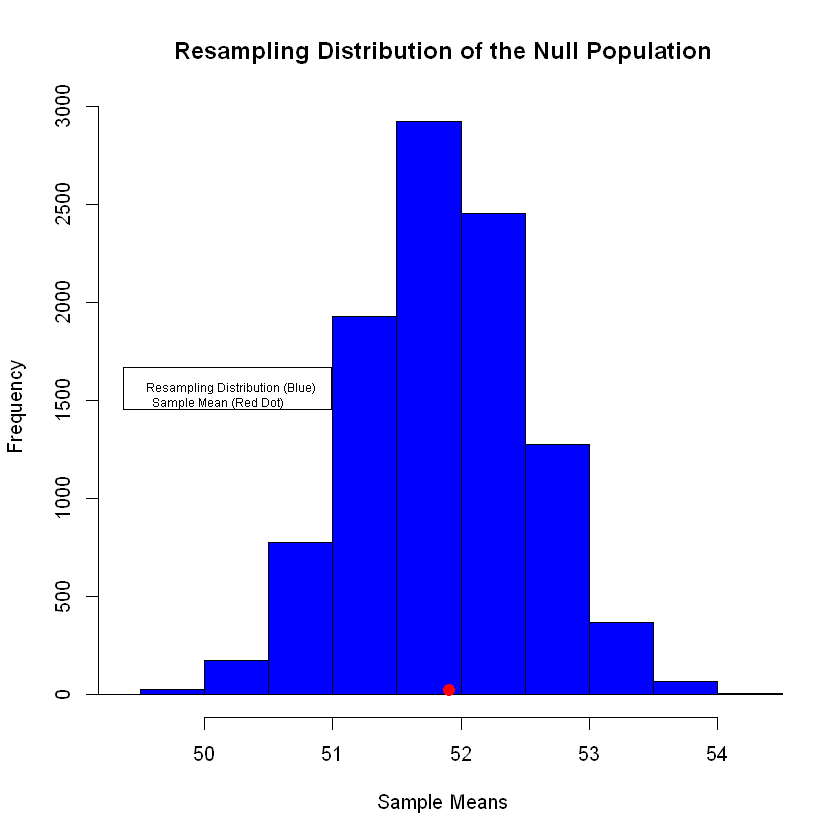

In [1]:
# using a coinflip to decide if the sample will be drawn from the null population, or an alternate population
coinflip = sample(c(0,1), size = 1)

# randomly determining the mean of the two populations
mean_1 = sample(seq(50,60), size = 1)
mean_2 = sample(seq(30,100), size = 1)

# making sure the alternate mean is not the same as the null mean
while(mean_1 == mean_2){mean_2 = sample(seq(50,60), size = 1)}

# creating the populations
if(coinflip == 0)
    {pop_1 = rnorm(n = 10000, mean = mean_1, sd = 15)
} else 
    {pop_1 = rnorm(n = 10000, mean = mean_1, sd = 15)
pop_2 = rnorm(n = 10000, mean = mean_2, sd = 15)}

# drawing a sample from one of the populations, conditional on the value of the coinflip

samp_size = sample(seq(100, 600), size = 1)

if(coinflip == 0)
{samp_1 = sample(pop_1, size = samp_size)

} else
{samp_1 = sample(pop_2, size = samp_size)
}

# plotting the population and the sample

hist(pop_1,  xlab = 'Score', ylab = 'Frequency', col = 'red', main = "" )
hist(samp_1, add = TRUE, col = 'lightblue')
title('Histogram of the Null Population (Red) and the Sample (Light Blue)')


# performing a one sample t test if the data is normally distributed, generating an error if not
norm_test = shapiro.test(samp_1)
print(norm_test)
f_test = var.test(pop_1, samp_1)
print(f_test)

if(norm_test$p.value > 0.05 & f_test$p.value >0.05){print('The sample data meets the parametric assumptions.')
                                res = t.test(x = samp_1, mu = mean_1)
                             print(res)
                             if(res$p.value <= 0.05){print('There was a significant difference between the sample mean and the population mean')
                                                    }else{print('There was NOT a significant difference between the sample mean and the population mean')}
                            }else{print('The sample does not meet the parametric assumptions, consider a nonparametric test!')}


# performing a permutation test (regardless of whether the sample meets the parametric assumptions)

n_iters = 10000
resamp_dist = vector(mode = 'numeric')

# creating a sampling distribution from the null population
for(i in seq(n_iters)) {
    resamp = mean(sample(pop_1, size = samp_size))
    resamp_dist = append(resamp_dist, resamp)}

# automatically scaling the x axis of the sampling distribution histogram
graph_max = max(c(abs(min(resamp_dist)), abs(max(resamp_dist)), abs(mean(samp_1))))
graph_min = min(c(min(resamp_dist), mean(samp_1)))

# plotting a histogram of the  estimated sampling distribution
hist(resamp_dist, main = 'Resampling Distribution of the Null Population',
    xlab = 'Sample Means', ylab = 'Frequency', col = 'blue', xlim = c(graph_min, graph_max))
points(mean(samp_1), y = n_iters/500, col = 'red', pch = 20, cex = 2) 
legend(x = min(resamp_dist), y =n_iters/6,cex = 0.6,  legend = 'Resampling Distribution (Blue) \n  Sample Mean (Red Dot)')

# calculating a p value for the permutation test (proportion of resampled means an equal or more extreme abolsute 
# distance from the sampling distribution mean as the actual sample mean)
grtr_than_sample_mean = subset(resamp_dist, abs(resamp_dist- mean(resamp_dist)) >= abs(mean(samp_1)- mean(resamp_dist)))

permutation_p = length(grtr_than_sample_mean)/length(resamp_dist)

print('P-value obtained from permutation test = ')
print(permutation_p)
